In [25]:
import pandas as pd
from pandas import DataFrame

## Load forest fire data

Display the years to use those later to match on weather data

In [26]:
# Load the amazon.csv
forest_fire_data = pd.read_csv('./amazon.csv', encoding='latin1')
display(forest_fire_data.head())

# List all unique year numbers (assuming a column named 'year' or similar)
unique_years = forest_fire_data['year'].unique()
print('Unique years:', unique_years)


,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


Unique years: [1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017]


In [27]:
# Map Portuguese month names to numbers in forest fire data
month_map = {
    'Janeiro': 1,
    'Fevereiro': 2,
    'Março': 3,
    'Abril': 4,
    'Maio': 5,
    'Junho': 6,
    'Julho': 7,
    'Agosto': 8,
    'Setembro': 9,
    'Outubro': 10,
    'Novembro': 11,
    'Dezembro': 12
}

if 'month' in forest_fire_data.columns:
    if forest_fire_data['month'].dtype == object:
        forest_fire_data['month'] = forest_fire_data['month'].map(month_map)

## Load weather data

Show years to check which ones align with the forest fire data

In [28]:
weather_data = pd.read_csv('./conventional_weather_stations_inmet_brazil_1961_2019.csv', sep=';', encoding='latin1')
display(weather_data.head())

weather_data['Ano'] = weather_data['Data'].astype(str).str[-4:]
unique_years_conv = weather_data['Ano'].unique()
print('Unique years:', unique_years_conv)


,Estacao,Data,Hora,Precipitacao,TempBulboSeco,TempBulboUmido,TempMaxima,TempMinima,UmidadeRelativa,PressaoAtmEstacao,PressaoAtmMar,DirecaoVento,VelocidadeVento,Insolacao,Nebulosidade,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Unnamed: 19
0,82024,01/01/1961,0,NaN,NaN,NaN,32.3,NaN,NaN,NaN,NaN,NaN,NaN,4.4,NaN,NaN,26.56,82.5,3.000000,NaN
1,82024,01/01/1961,1200,NaN,26.0,23.9,NaN,22.9,83.0,994.2,NaN,5.0,5.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN
2,82024,01/01/1961,1800,NaN,32.3,27.0,NaN,NaN,65.0,991.6,NaN,5.0,3.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN
3,82024,02/01/1961,0,NaN,25.8,24.6,33.2,NaN,91.0,991.9,NaN,9.0,1.0,10.0,7.0,NaN,28.06,77.5,5.666667,NaN
4,82024,02/01/1961,1200,16.0,26.8,24.0,NaN,23.7,78.0,995.0,NaN,5.0,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN


Unique years: ['1961' '1962' '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977'
 '1978' '1979' '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987'
 '1988' '1989' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000'
 '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010'
 '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019' '1963'
 '1964' '1965' '1966' '1967' '1968' '1969' '1990' '1991' '1992']


## Load weather stations in brazil data

This can be matched with the weather data based on the station code

In [29]:
# Load the CatalogoEstaçõesConvencionais.csv data with semicolon separator and display the first few rows
df_catalogo = pd.read_csv('./CatalogoEstaçõesConvencionais.csv', sep=';', encoding='latin1')
display(df_catalogo.head())

# Show columns and basic info
print('Columns:', df_catalogo.columns.tolist())
df_catalogo.info()

,DC_NOME,SG_ESTADO,CD_SITUACAO,VL_LATITUDE,VL_LONGITUDE,VL_ALTITUDE,DT_INICIO_OPERACAO,CD_ESTACAO
0,ALTAMIRA,PA,Operante,"-3,21416666","-52,21305555","101,51",23/04/1927,82353
1,ALTO DA BOA VISTA,RJ,Operante,"-22,96583333","-43,27916666",366,31/05/1966,83007
2,APODI,RN,Operante,"-5,62666666","-37,815","131,37",17/12/1962,82590
3,ARACUAI,MG,Operante,"-16,84888888","-42,06083333","317,67",05/09/1918,83442
4,ARAGUAINA,TO,Operante,"-7,10388888","-48,20138888","231,85",20/08/1984,82659


Columns: ['DC_NOME', 'SG_ESTADO', 'CD_SITUACAO', 'VL_LATITUDE', 'VL_LONGITUDE', 'VL_ALTITUDE', 'DT_INICIO_OPERACAO', 'CD_ESTACAO']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DC_NOME             112 non-null    object
 1   SG_ESTADO           112 non-null    object
 2   CD_SITUACAO         112 non-null    object
 3   VL_LATITUDE         112 non-null    object
 4   VL_LONGITUDE        112 non-null    object
 5   VL_ALTITUDE         112 non-null    object
 6   DT_INICIO_OPERACAO  112 non-null    object
 7   CD_ESTACAO          112 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 7.1+ KB


### Make a list of state names and abbreviations since the forest fire data uses state names

In [30]:
# Map state abbreviations to full state names
state_map = {
    "AC": "Acre",
    "AL": "Alagoas",
    "AP": "Amapá",
    "AM": "Amazonas",
    "BA": "Bahia",
    "CE": "Ceará",
    "DF": "Distrito Federal",
    "ES": "Espírito Santo",
    "GO": "Goiás",
    "MA": "Maranhão",
    "MT": "Mato Grosso",
    "MS": "Mato Grosso do Sul",
    "MG": "Minas Gerais",
    "PA": "Pará",
    "PB": "Paraíba",
    "PR": "Paraná",
    "PE": "Pernambuco",
    "PI": "Piauí",
    "RJ": "Rio de Janeiro",
    "RN": "Rio Grande do Norte",
    "RS": "Rio Grande do Sul",
    "RO": "Rondônia",
    "RR": "Roraima",
    "SC": "Santa Catarina",
    "SP": "São Paulo",
    "SE": "Sergipe",
    "TO": "Tocantins"
}


## Aggregrate the data sets into one

In [31]:
# Merge df_conv with df_catalogo to get SG_ESTADO for each Estacao (weather station code)
weather_data = pd.merge(weather_data, df_catalogo[['CD_ESTACAO', 'SG_ESTADO']], left_on='Estacao', right_on='CD_ESTACAO', how='left')

# Map the state abbreviation (SG_ESTADO) to the full state name using state_map
weather_data['state_name'] = weather_data['SG_ESTADO'].map(state_map)


## Remove unnecesary years and columns

In [32]:
# Filter df_conv to only include years present in the amazon dataset
years_amazon = set(forest_fire_data['year'].unique())
df_conv_filtered = weather_data[weather_data['Ano'].astype(int).isin(years_amazon)].copy()

# Drop the columns: 'Estacao', 'CD_ESTACAO', 'SG_ESTADO'
cols_to_drop = ['Estacao', 'CD_ESTACAO', 'SG_ESTADO']
df_conv_filtered = df_conv_filtered.drop(columns=[col for col in cols_to_drop if col in df_conv_filtered.columns])

# Display the filtered DataFrame
display(df_conv_filtered.head())

,Data,Hora,Precipitacao,TempBulboSeco,TempBulboUmido,TempMaxima,TempMinima,UmidadeRelativa,PressaoAtmEstacao,PressaoAtmMar,...,VelocidadeVento,Insolacao,Nebulosidade,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Unnamed: 19,Ano,state_name
25123,01/01/1998,0,NaN,29.4,26.2,32.8,NaN,77.0,NaN,NaN,...,0.0,4.9,7.0,2.1,28.36,63.50,2.000000,NaN,1998,Roraima
25124,01/01/1998,1200,0.1,27.2,25.0,NaN,24.6,83.0,NaN,NaN,...,3.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,1998,Roraima
25125,01/01/1998,1800,NaN,32.6,25.2,NaN,NaN,53.0,NaN,NaN,...,3.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,1998,Roraima
25126,02/01/1998,0,NaN,28.6,22.8,32.8,NaN,59.0,NaN,NaN,...,0.0,6.9,2.0,7.7,28.48,59.75,2.333333,NaN,1998,Roraima
25127,02/01/1998,1200,0.0,26.6,23.2,NaN,24.2,74.0,NaN,NaN,...,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1998,Roraima


In [33]:
# Map Portuguese month names to numbers if needed
month_map = {
    'Janeiro': 1,
    'Fevereiro': 2,
    'Março': 3,
    'Abril': 4,
    'Maio': 5,
    'Junho': 6,
    'Julho': 7,
    'Agosto': 8,
    'Setembro': 9,
    'Outubro': 10,
    'Novembro': 11,
    'Dezembro': 12
}

# If the month column is in Portuguese, map it to numbers
if 'Mês' in df_conv_filtered.columns:
    df_conv_filtered['month'] = df_conv_filtered['Mês'].map(month_map)
elif 'Mes' in df_conv_filtered.columns:
    df_conv_filtered['month'] = df_conv_filtered['Mes'].map(month_map)
# If already numeric, ensure it's int
elif 'month' in df_conv_filtered.columns:
    df_conv_filtered['month'] = df_conv_filtered['month'].astype(int)

In [34]:
forest_fire_data

,year,state,month,number,date
0,1998,Acre,1,0.0,1998-01-01
1,1999,Acre,1,0.0,1999-01-01
2,2000,Acre,1,0.0,2000-01-01
3,2001,Acre,1,0.0,2001-01-01
4,2002,Acre,1,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,12,128.0,2012-01-01
6450,2013,Tocantins,12,85.0,2013-01-01
6451,2014,Tocantins,12,223.0,2014-01-01
6452,2015,Tocantins,12,373.0,2015-01-01


In [35]:
def get_consecutive_dry_days(rain_series):
    dry = rain_series < 1
    max_streak = 0
    current_streak = 0
    for is_dry in dry:
        if is_dry:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 0
    return max_streak

# Ensure date columns are correct
df_conv_filtered['Data'] = pd.to_datetime(df_conv_filtered['Data'], errors='coerce')
df_conv_filtered['year'] = df_conv_filtered['Data'].dt.year
df_conv_filtered['month'] = df_conv_filtered['Data'].dt.month

# Use correct column names for aggregation
agg_df = df_conv_filtered.groupby(['state_name', 'year', 'month']).agg(
    temp_mean = ('Temp Comp Media', 'mean'),
    temp_max = ('Temp Comp Media', 'max'),
    temp_std = ('Temp Comp Media', 'std'),
    wind_mean = ('Velocidade do Vento Media', 'mean'),
    wind_max = ('Velocidade do Vento Media', 'max'),
    rain_total = ('Precipitacao', 'sum'),
    num_dry_days = ('Precipitacao', lambda x: (x < 1).sum()),
    max_consec_dry_days = ('Precipitacao', get_consecutive_dry_days)
).reset_index()

# Prepare fire data for merge
if 'state' in forest_fire_data.columns:
    fire_df = forest_fire_data.copy()
else:
    fire_df = forest_fire_data.rename(columns={'estado': 'state'})

# Ensure year and month columns are integers in both DataFrames
fire_df['year'] = fire_df['year'].astype(int)
fire_df['month'] = fire_df['month'].astype(int)
agg_df['year'] = agg_df['year'].astype(int)
agg_df['month'] = agg_df['month'].astype(int)

# Merge on state, year, month
merged = pd.merge(
    fire_df,
    agg_df,
    left_on=['state', 'year', 'month'],
    right_on=['state_name', 'year', 'month'],
    how='left'
)

# Only keep fire data columns + the new weather features
fire_cols = fire_df.columns.tolist()
weather_cols = [
    'temp_mean', 'temp_max', 'temp_std',
    'wind_mean', 'wind_max',
    'rain_total', 'num_dry_days', 'max_consec_dry_days'
]
final_merged = merged[fire_cols + weather_cols]
display(final_merged.head())


,year,state,month,number,date,temp_mean,temp_max,temp_std,wind_mean,wind_max,rain_total,num_dry_days,max_consec_dry_days
0,1998,Acre,1,0.0,1998-01-01,27.390000,28.34,0.856894,0.472222,0.666667,55.6,9.0,1.0
1,1999,Acre,1,0.0,1999-01-01,24.020000,24.02,NaN,0.477778,0.666667,88.9,8.0,1.0
2,2000,Acre,1,0.0,2000-01-01,25.510000,27.26,1.627845,0.416666,0.666667,55.5,7.0,1.0
3,2001,Acre,1,0.0,2001-01-01,25.456667,27.70,1.181119,0.500000,0.666667,187.8,6.0,1.0
4,2002,Acre,1,0.0,2002-01-01,25.180909,27.14,1.467770,0.666667,2.000000,129.7,5.0,1.0


## Regression Machine Learning Solution
We will use the prepared dataset to train a regression model that predicts the number of forest fires based on weather features.

In [36]:
# Prepare data for regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Use the merged DataFrame from previous steps (final_merged)
df = final_merged.dropna().copy()  # Drop rows with missing values for simplicity

# Features: weather columns, Target: number of fires (assume column is 'number' or similar)
feature_cols = [
    'temp_mean', 'temp_max', 'temp_std',
    'wind_mean', 'wind_max',
    'rain_total', 'num_dry_days', 'max_consec_dry_days'
 ]
target_col = 'number' if 'number' in df.columns else df.columns[-1]  # fallback to last column if unsure

X = df[feature_cols]
y = df[target_col]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Feature columns:', feature_cols)
print('Target column:', target_col)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Feature columns: ['temp_mean', 'temp_max', 'temp_std', 'wind_mean', 'wind_max', 'rain_total', 'num_dry_days', 'max_consec_dry_days']
Target column: number
Train shape: (2458, 8) Test shape: (615, 8)


In [37]:
# Train a regression model and evaluate
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test R^2: {r2:.2f}")

Test MSE: 41797.01
Test R^2: -0.07


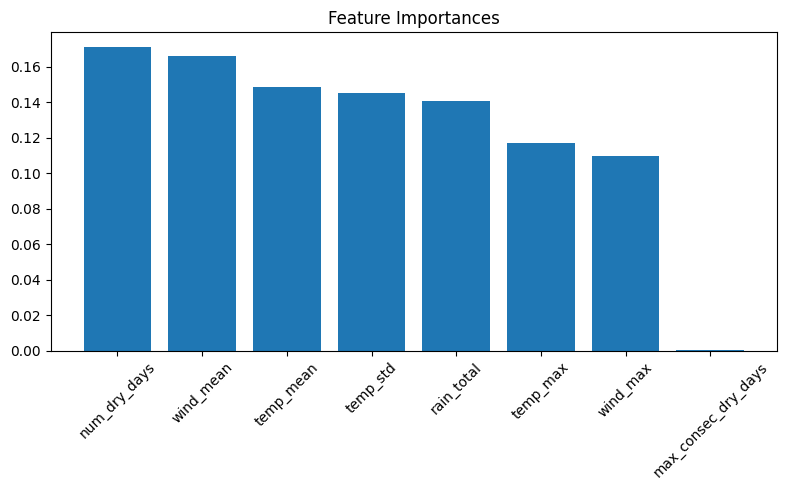

In [38]:
# Plot feature importances
import matplotlib.pyplot as plt

importances = reg.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_cols[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()